# Confusion Matrix:

*   Used for Classification, for both binary and Multi-Class Classification
*   Rows ==> Actual and Column ==> Predicted   [Conventionally]
*   Used for measuring Accuracy of the model.





# Confusion Matrix for Binary Classification

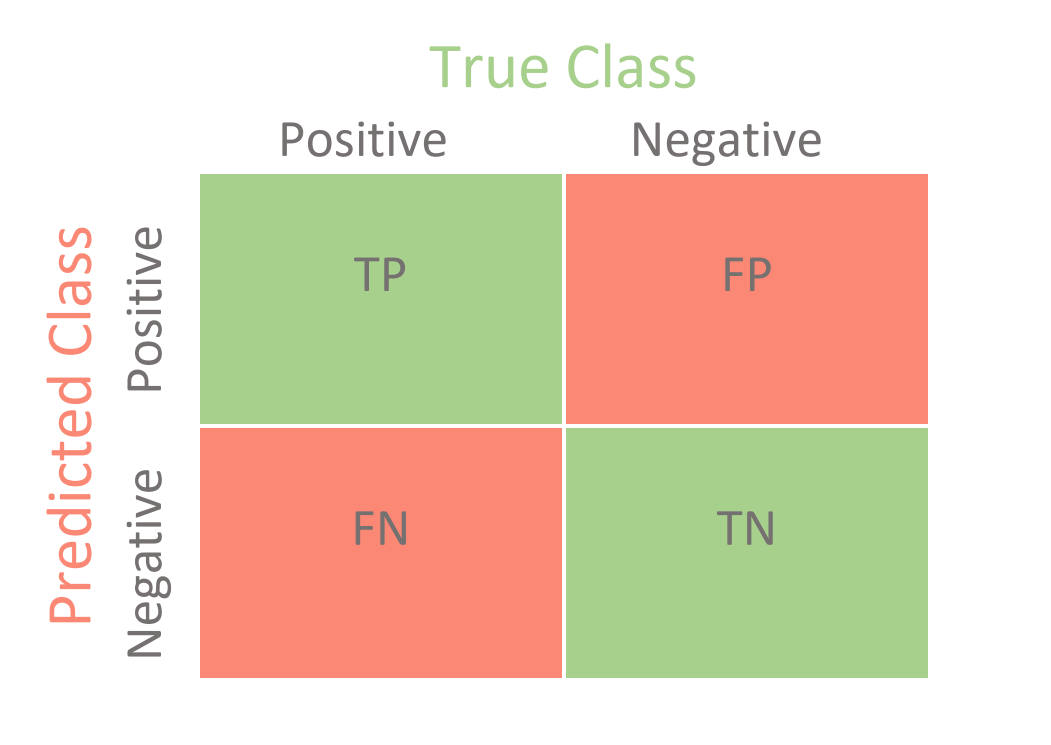

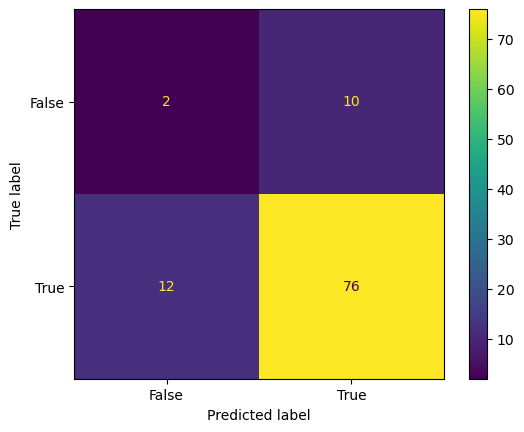

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

actual =np.random.binomial(1,.9,size=100)
predicted = np.random.binomial(1,.9,size=100)

confusion_matrix = metrics.confusion_matrix(actual,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False,True])

cm_display.plot()
plt.show()

## Results Explained

The Confusion Matrix created has four different quadrants:

True Negative (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Positive (Bottom-Right Quadrant)
True means that the values were accurately predicted, False means that there was an error or wrong prediction.

The matrix provides us with many useful metrics that help us to evaluate out classification model.

The different measures include: Accuracy, Precision, Sensitivity (Recall), Specificity, and the F-score, explained below.

In [2]:
tn,fp,fn,tp=confusion_matrix.ravel()   #used for printing the result of Confusion matrix 
print(tn,fp,fn,tp)

2 10 12 76


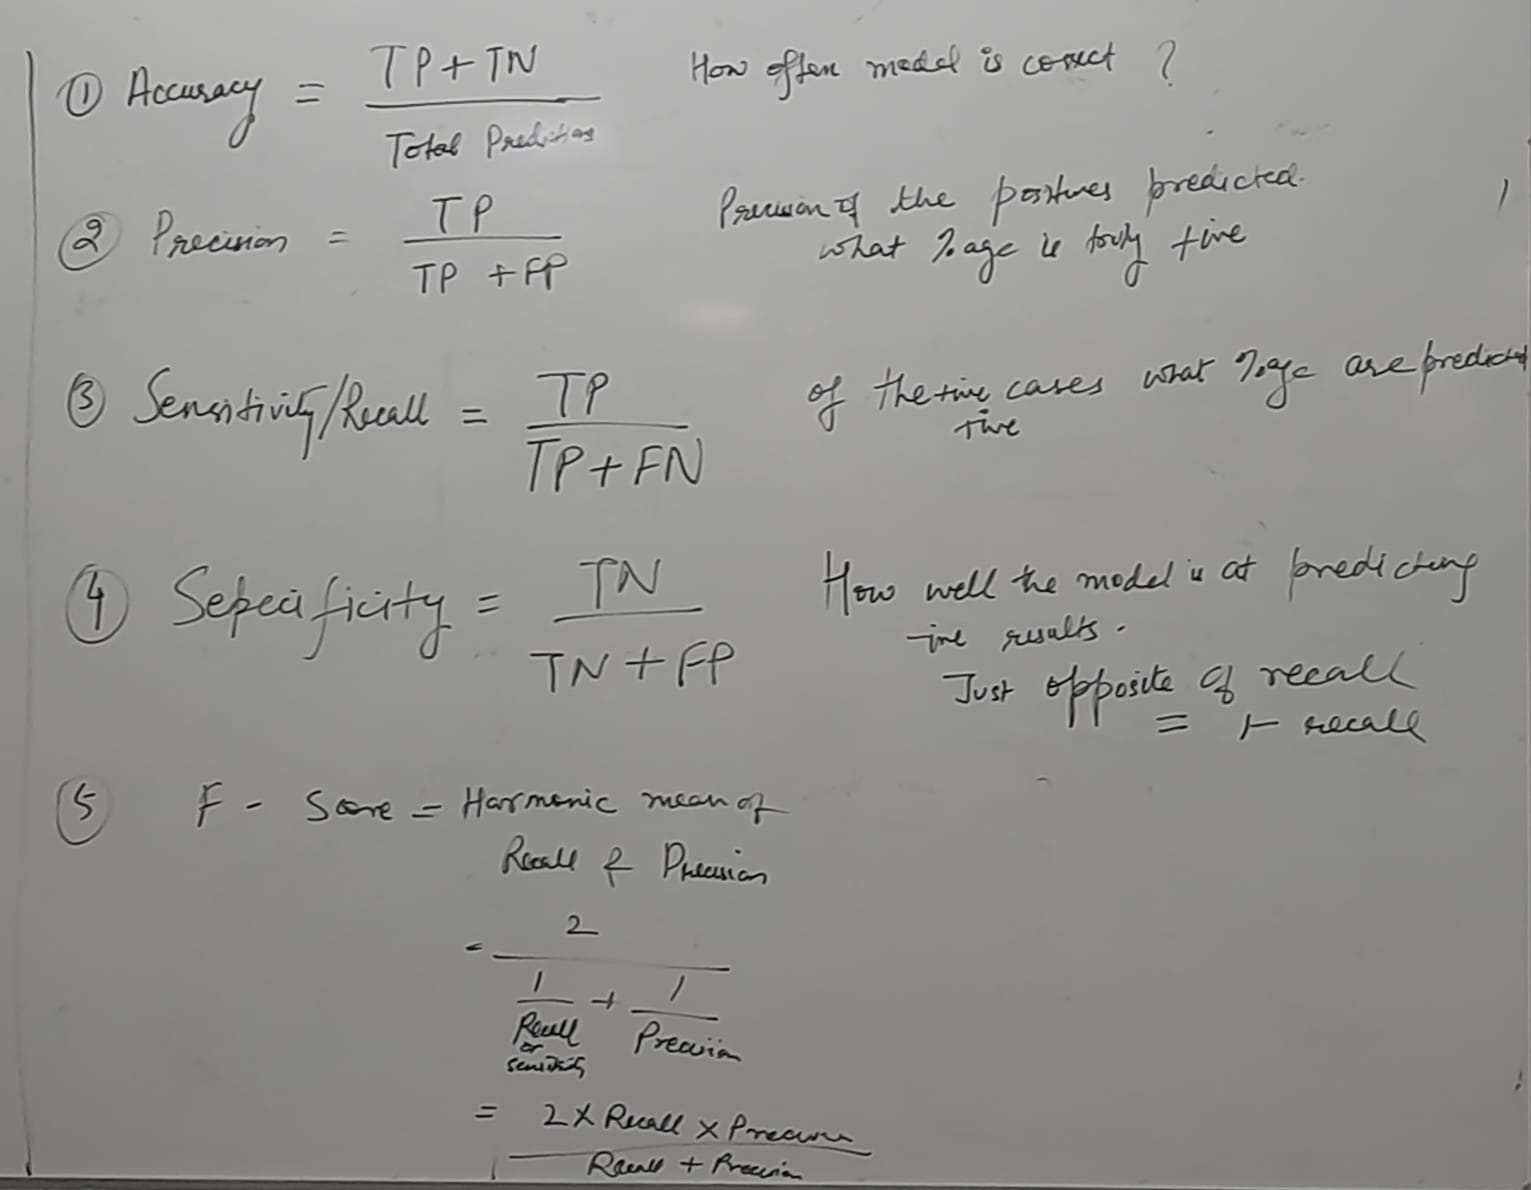

In [3]:
#Accuracy

Accuracy= metrics.accuracy_score(actual,predicted)
Accuracy

0.78

In [4]:
#Precision

Precision= metrics.precision_score(actual,predicted)
Precision

0.8837209302325582

In [5]:
# Recall/Sensitivity

recall= metrics.recall_score(actual,predicted)
recall

0.8636363636363636

In [6]:
# Specificity

specificity= metrics.recall_score(actual,predicted,pos_label=0)
specificity

0.16666666666666666

In [7]:
# F1-Score

F= metrics.f1_score(actual,predicted)
F

0.8735632183908046

A good model is one which has high TP and TN with low FP and FN.


If you have an imbalanced dataset to work with, it’s always better to use confusion matrix as your evaluation criteria for your machine learning model.

# Confusion Matrix for Multi-Class Classification

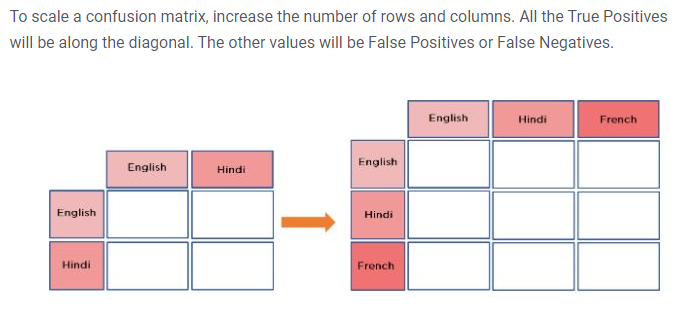

### Example :

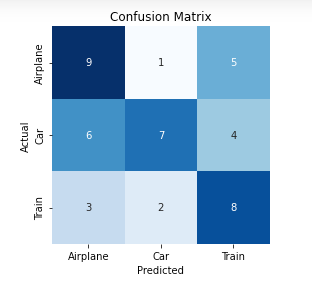

## Calculation for class Airplane
    TP = 9
    FN = 1+5 = 6
    FP = 6+3 = 9
    TN = 7+4+2+8 = 21
    Precision = TP/(TP+FP) = 9/(9+9) = 0.5
    Recall = TP/(TP+FN) = 9/(9+6) = 0.6
    F1 = 2*(0.5*0.6)/(0.5+0.6) = 5.55

In [147]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
#Importing of dataset to dataframe. 
df = pd.read_csv("iris_data.csv", header=None)

In [149]:
#To see first 5 rows of the dataset
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [150]:
#To know the data types of the variables.
df.dtypes

0    float64
1    float64
2    float64
3    float64
4     object
dtype: object

In [151]:
#Speceis is the output class,to know the count of each class we use value_counts()
df[4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [152]:
#Separating independant variable and dependent variable("Species")
X = df.drop([4], axis=1)
y = df[4]
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [153]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [154]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [155]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [156]:
#clf = SVC(kernel='linear')
#clf.fit(X_train, y_train)

In [158]:
#training the classifier using X_Train and y_train

clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-vir

In [159]:
#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [160]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [161]:
from sklearn.metrics import classification_report
conf_rep=classification_report(y_test, y_pred)
print(conf_rep)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [162]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

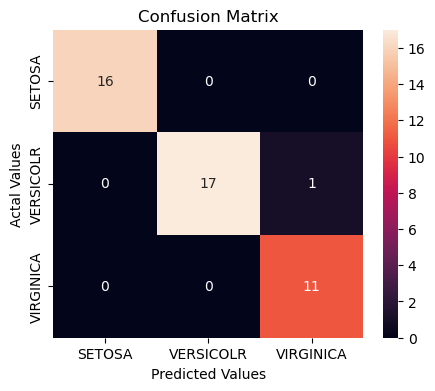

In [163]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()